{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
LinearSVC
KNeighborsClassifier
MLPClassifier
LinearDiscriminantAnalysis
VotingClassifier


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

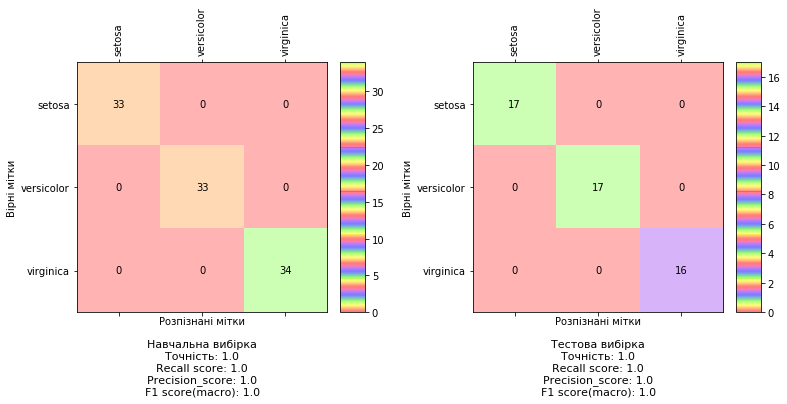

________________________________________________________________________


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from data_print import pp_conf_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier                
from sklearn.feature_selection import SelectFromModel   
from matplotlib.font_manager import FontProperties
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA,KernelPCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression,SGDClassifier
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler
from imblearn.ensemble import BalancedRandomForestClassifier,BalancedBaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron,RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA,KernelPCA,TruncatedSVD
from EstimatorSelectionHelper import GridSearchCV_Classifiers, Best_Classifiers

   
    
    
    

iris = load_iris()
X=iris.data
y = iris.target
y_names=list(iris.target_names)
y_names={i:y_names[i] for i in range(len(y_names))}
print(y_names)


X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.33,random_state=0)



models_params_Voting={
        
           
        'LinearSVC': [Pipeline([('reduce_dim',None),('clf',CalibratedClassifierCV(LinearSVC()))]),
                                   {'reduce_dim':[None],
                                    'clf__base_estimator__loss':['squared_hinge'],
                                    'clf__base_estimator__C':[3],                                   
                                    },
                                   ],
                
        'KNeighborsClassifier':[Pipeline([('reduce_dim',None),('clf',KNeighborsClassifier())]),
                                   {'reduce_dim':[PCA()],
                                    'reduce_dim__n_components':[2],
                                    'clf__n_neighbors':[1],                                   
                                    'clf__algorithm':['ball_tree'],
                                   
                                    }],
        'MLPClassifier':[Pipeline([('reduce_dim',None),('clf',MLPClassifier())]),
                                   {'reduce_dim':[None],
                                    'clf__activation':['tanh'],
                                    'clf__solver':['lbfgs'],
                                    'clf__learning_rate':['constant'],
                                    'clf__alpha':[0.00005],
                                    }],
       
        'LinearDiscriminantAnalysis': [Pipeline([('reduce_dim',None),('clf',LinearDiscriminantAnalysis())]),
                                   {'reduce_dim':[PCA()],
                                    'reduce_dim__n_components':[3],
                                    'clf__solver':['lsqr'],
                                     'clf__n_components':[2],         
                                    }],      
      
        
    }



estimators=dict_to_models(models_params_Voting)
models_params_finale={
       
         'VotingClassifier':[VotingClassifier(estimators=estimators),
                        {'voting':['soft'],
                         'weights':[(2, 4, 2, 2)]}]
    
        
    }



Best_Classifiers(X_train, X_test, y_train, y_test,models_params=models_params_finale,expl_lables=y_names)
